In [1]:
# import statements
from Tools.toolbox import *
from Tools.functions import *
import csv
from scipy.stats import ks_2samp
import pandas as pd


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
plt.rcParams['font.size'] = 15

In [3]:
dates_ebola = []
countries_ebola = []
with open('data/ebola_sorted.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        countries_ebola.append(row[0])
        dates_ebola.append(row[4])

data = {
    'Country': countries_ebola,
    'Date Onset Inferred': dates_ebola
}

df = pd.DataFrame(data)
df = df[df['Date Onset Inferred'] != 'NA']
countries = df.groupby('Country')
df_guinea = countries.get_group('Guinea')
dates_guinea = [date for date in df_guinea['Date Onset Inferred']]
df_liberia = countries.get_group('Liberia')
dates_liberia = [date for date in df_liberia['Date Onset Inferred']]
df_sierra = countries.get_group('Sierra Leone')
dates_sierra = [date for date in df_sierra['Date Onset Inferred']]
def sort_dates(dates):
    def date_key(date_string):
        return datetime.strptime(date_string, '%d/%m/%Y')
    return sorted(dates, key=date_key)
dates_all = sort_dates(df['Date Onset Inferred'])

In [4]:
date_nums_guinea = [convert_date_to_numberB(date, dates_guinea[0]) for date in dates_guinea]
date_nums_liberia = [convert_date_to_numberB(date, dates_liberia[0]) for date in dates_liberia]
date_nums_sierra = [convert_date_to_numberB(date, dates_sierra[0]) for date in dates_sierra]
date_nums_all = [convert_date_to_numberB(date, dates_all[0]) for date in dates_all]

In [5]:
observed_guinea = distribute(date_nums_guinea)
observed_liberia = distribute(date_nums_liberia)
observed_sierra = distribute(date_nums_sierra)
observed_all = distribute(date_nums_all)

In [6]:
event_times = observed_all

In [54]:
n150 = binary_search(event_times, 150)
n180 = binary_search(event_times, 180)
n300 = binary_search(event_times, 300)
n360 = binary_search(event_times, 360)
n450 = binary_search(event_times, 450)
n540 = binary_search(event_times, 540)


In [37]:
def count_by_week(times, n):
    counts = []
    start = int(times[0])
    end = start + 7
    pos = 0
    for _ in range(n):
        counts.append(binary_search(times, end) - pos)
        pos += counts[-1]
        end += 7
    return np.array(counts)

def count_by_day(times, n):
    counts = []
    start = int(times[0])
    end = start + 1
    pos = 0
    for _ in range(n):
        counts.append(binary_search(times, end) - pos)
        pos += counts[-1]
        end += 1
    return np.array(counts)


## Simulation from 150 days

In [24]:
%store -r samples_thinning150
%store -r samples_branching150

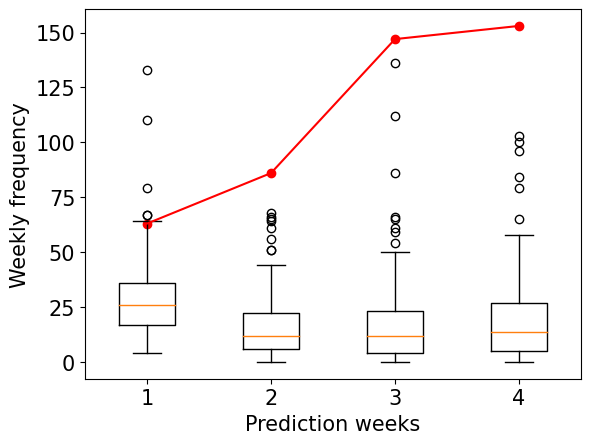

In [53]:
samples150 = [sample[n150:] for sample in samples_branching150]
data150 = [[],[],[],[]]
for sample in samples150:
    for i in range(4):
        data150[i].append(count_by_week(sample, 4)[i])
data_a150 = count_by_week(event_times[n150:n180], 4)
plt.boxplot(data150)
plt.scatter(range(1, 5, 1), data_a150, color="r")
plt.plot(range(1, 5, 1), data_a150, color="r")
plt.xlabel("Prediction weeks")
plt.ylabel("Weekly frequency")
plt.show()

## Simulation from 300 days

In [20]:
%store -r samples_thinning300
%store -r samples_branching300

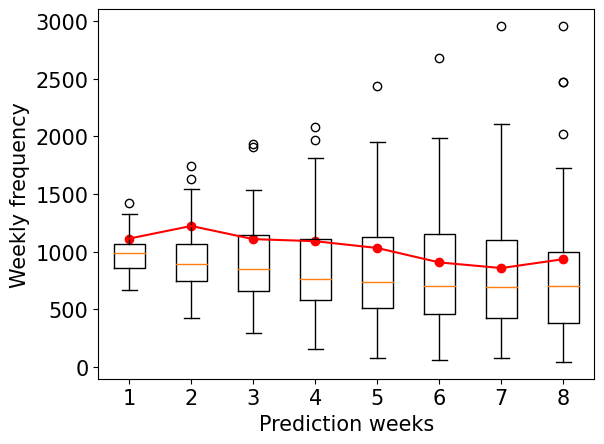

In [64]:
n = 60 // 7
samples300 = [sample[n300:] for sample in samples_branching300]
data300 = [[] for _ in range(n)]
for sample in samples300:
    for i in range(8):
        data300[i].append(count_by_week(sample, n)[i])
data_a300 = count_by_week(event_times[n300:n360], n)
plt.boxplot(data300)
plt.scatter(range(1, n+1, 1), data_a300, color="r")
plt.plot(range(1, n+1, 1), data_a300, color="r")
plt.xlabel("Prediction weeks")
plt.ylabel("Weekly frequency")
plt.show()

## Simulation from 450 days

In [22]:
%store -r samples_thinning450
%store -r samples_branching450

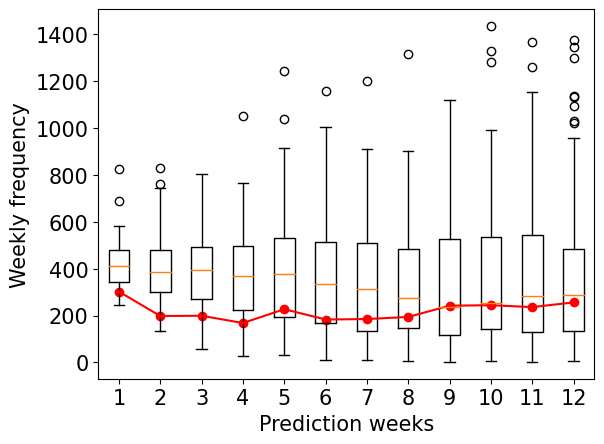

In [63]:
n = 90 // 7
samples450 = [sample[n450:] for sample in samples_branching450]
data450 = [[] for _ in range(n)]
for sample in samples450:
    for i in range(n):
        data450[i].append(count_by_week(sample, n)[i])
data_a450 = count_by_week(event_times[n450:n540], n)
plt.boxplot(data450)
plt.scatter(range(1, n+1, 1), data_a450, color="r")
plt.plot(range(1, n+1, 1), data_a450, color="r")
plt.xlabel("Prediction weeks")
plt.ylabel("Weekly frequency")
plt.show()